## Consigne

Le travail attendu pour ces 3 semaines est à faire dans les fichiers `session1.py`, `session2.py`, `session3.py`. 

Les fichiers `session{1|2|3}.py` commenceront par un commentaire avec les noms de leur auteur :

```python
# prenom1 nom1
# prenom2 nom2
```

Une attention particulière sera portée à la qualité de la documentation de votre code.

Cette semaine, il s'agit de travaillr dans session1.py

In [1]:
import session1 as project
import pandas as pd

# Cultures associées et Maraîchage diversifié

L'agriculture est dominée par un modèle ou de grandes exploitations cultivent en monocultures. Pourtant, de plus en plus de données montrent que ce type d'agriculture n'est pas soutenable. En focalisant sur le maraîchage, ce sujet propose d'explorer la viabilité des fermes qui cultivent de multiples variétés de légumes. 

En particulier, on étudiera dans un premier temps les données qui indiquent si la pratique qui consiste à mélanger des cultures sur une même parcelle permet d'obtenir de bons rendements. Ensuite, il s'agit de déterminer si les fermes de maraîchage diversifiés sont viable en termes de revenus et de charge de travail. Enfin, on s'interessera à la façon de réaliser ces associations dans des simulations spatialisées de la ferme.

## Session 1: Analyse de données de cultures associées

On considère des associations de 2 cultures (Crop 1 et Crop 2) et on s'intéresse aux rendements de différentes couples de cultures associées ($I_i$ = Crop\_\{i\}\_yield_intercropped) comparés à ceux des cultures seules ($S_i$ = Crop\_\{i\}\_yield_sole). Pour une culture, on définit le ratio de terrain équivalent (LER-Land equivalent ratio) comme $LER_i=I_i/S_i$ avec $i \in \{1,2\}$. Le LER total pour une association est $LER_{tot} = \sum_{i \in \{1,2\}} LER_i$. 

On a a disposition 2 datasets qui rassemblent les rendements pour les cultures isolées et pour les cultures mélangées Ces données sont issues des publications suivantes:
* Li, C., Stomph, T. J., Makowski, D., Li, H., Zhang, C., Zhang, F., & van der Werf, W. (2023). The productive performance of intercropping. Proceedings of the National Academy of Sciences, 120(2), e2201886120
* Paut, R., Garreau, L., Ollivier, G., Sabatier, R., & Tchamitchian, M. (2024). A global dataset of experimental intercropping and agroforestry studies in horticulture. Scientific Data, 11(1), 5.

In [11]:
d1=pd.read_csv("data/session1/dataset_PNAS_2023.csv")
d2=pd.read_csv("data/session1/dataset_natcom_2024.csv")


1. Ces données sont parfois incomplètes, certaines entrées ne sont pas des nombres valides. Ecrire une fonction `get_valid_indices_all_vars` qui pour une liste de variables renvoie les indices où les entrées sont des nombres valides.

In [3]:
idxs = project.get_valid_indices_all_vars([d1['Crop_1_yield_sole'].to_numpy(),d1['Crop_2_yield_sole'].to_numpy()])
print("Only %s/%s entries have valid S_i in dataset 1"%(len(idxs), len(d1)))
idxs = project.get_valid_indices_all_vars([d2['Crop_1_yield_sole'].to_numpy(),d2['Crop_2_yield_sole'].to_numpy()])
print("Only %s/%s entries have valid S_i in dataset 2"%(len(idxs), len(d2)))

Only 934/934 entries have valid S_i in dataset 1
Only 956/1544 entries have valid S_i in dataset 2


2. Calculer les LERs pour les deux datasets en utilisants les entrées valides. Tracer la distribution des LERs et comparer les LERs ainsi calculés avec ceux des papiers (LER_tot). Fitter un modèle linéaire en utilisant sckit-learn.

In [4]:
LER_calc_1 = project.compute_LER(d1)
print(LER_calc_1)
LER_calc_2 = project.compute_LER(d2)
print(LER_calc_2)

0      0.966902
1      1.057247
2      1.206042
3      1.115039
4      1.616021
         ...   
929    1.785165
930    1.672960
931    1.863529
932    1.594307
933    1.678161
Length: 934, dtype: float64
0       1.226644
1       1.249229
2       1.116408
3       1.402344
4       3.217687
          ...   
1539    0.841961
1540    0.928492
1541    1.114181
1542    0.945848
1543    1.233337
Length: 952, dtype: float64


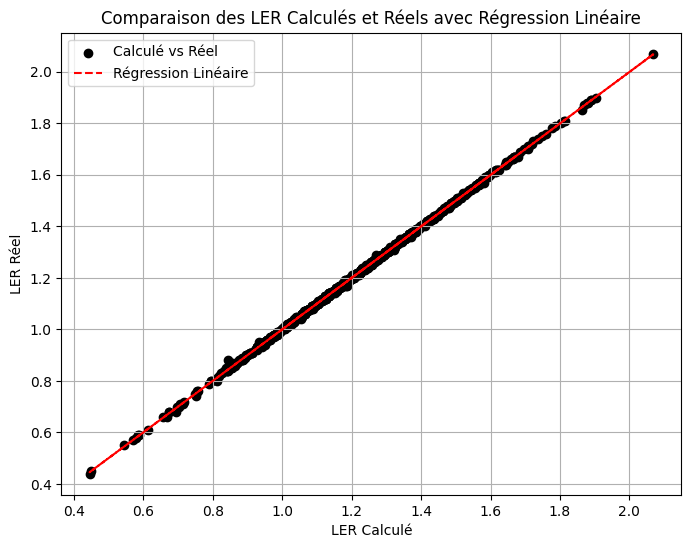

RMSE : 1.6329509061755666e-05
R² : 0.9996849942993267


In [5]:
project.plot_LERs(LER_calc_1, d1['LER_tot'].to_numpy())

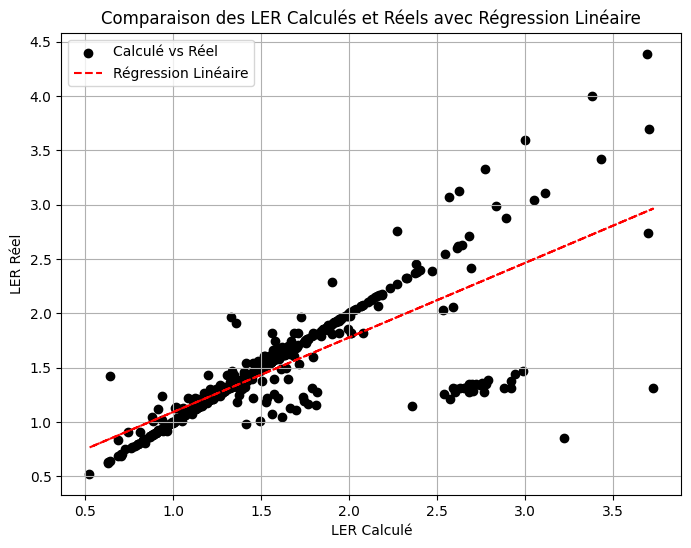

RMSE : 0.07852940138970739
R² : 0.6108283423933465


In [6]:
filtered_d2 = project.filter_d2_valid_entries(d2)
aligned_LER_calc_2 = LER_calc_2[filtered_d2.index]
project.plot_LERs(aligned_LER_calc_2, filtered_d2['LER_tot'].to_numpy())

Résultats pour Dataset 1 :
RMSE : 1.6329509061755666e-05
Le RMSE très faible pour Dataset 1 indique une très bonne précision du modèle. 
L'écart quadratique moyen entre les valeurs observées et prédites est quasiment nul, ce qui montre que le modèle fait des prédictions presque parfaites.

R² : 0.9996849942993267
Un R² proche de 1 (ici 0.9997) suggère que le modèle explique presque toute la variance des données, 
ce qui signifie que l'ajustement du modèle aux données observées est exceptionnel.

Résultats pour Dataset 2 :
RMSE : 0.07852940138970739
Le RMSE pour Dataset 2 est significativement plus élevé que pour Dataset 1, 
ce qui indique que le modèle présente une plus grande erreur de prédiction sur ce jeu de données. 
Il y a donc un écart plus important entre les valeurs prédites et les valeurs observées dans Dataset 2.

R² : 0.6108283423933465
Un R² de 0.6108 signifie que le modèle n'explique que 61% de la variance des données, 
ce qui est relativement faible par rapport à Dataset 1. Cela suggère que le modèle ajuste moins bien les données dans ce cas, 
et qu'il y a probablement des facteurs non capturés ou des problèmes dans les relations entre les variables.

Conclusion:
Dataset 1 : Le modèle performe exceptionnellement bien sur ce jeu de données, avec une valeur RMSE très faible (proche de zéro) et un R² proche de 1, 
indiquant un ajustement presque parfait aux données.
Dataset 2 : En revanche, le modèle présente une valeur RMSE beaucoup plus élevée, 
ce qui signifie que les prédictions sont moins précises. 
Le R² plus faible (0.6108) montre que le modèle n'explique qu'une portion modeste de la variance des données, indiquant un ajustement moins bon.
Ainsi, le modèle semble être plus efficace sur le Dataset 1 que sur le Dataset 2.

3. Calculer la moyenne et la variance des LERs. Montrer que l'estimateur naïf pour la variance est biaisé. Calculer l'intervalle de confiance à 95%. Tester avec statsmodels l'hypothèse <span style="text-decoration:overline">LER</span>>1.

In [7]:
mLER, sLER, inter = project.compute_mean_std_inter(d1['LER_tot'].to_numpy())
print("Dataset 1 Mean: %s, Std: %s, interval .95: [%s, %s]"%(mLER, sLER, inter[0], inter[1]))

mLER, sLER, inter = project.compute_mean_std_inter(d2['LER_tot'].to_numpy())
print("Dataset 2 Mean: %s, Std: %s, interval .95: [%s, %s]"%(mLER, sLER, inter[0], inter[1]))

H0 = project.testH0(d1['LER_tot'].to_numpy())

sLER_biased : 0.22768129734656678
sLER_unbiased : 0.22780328037023712
variance_LER : 0.05183877316141576
Dataset 1 Mean: 1.21389721627409, Std: 0.22768129734656678, interval .95: [1.1992955637168101, 1.2284988688313698]
sLER_biased : 0.4609378570563445
sLER_unbiased : 0.4611776166861111
variance_LER : 0.21246370806769507
Dataset 2 Mean: 1.3941361746361747, Std: 0.4609378570563445, interval .95: [1.3650086932488517, 1.4232636560234977]
sLER_biased : 0.22768129734656678
sLER_unbiased : 0.22780328037023712
variance_LER : 0.05183877316141576
Statistique z : 28.711191328928084
p-valeur pour H0 (mu = 1) contre H1 (mu > 1) : 0.0


1. Moyenne et écart-type :
   - Ensemble de données 1 : La moyenne des LERs est 1.2139, et l'écart-type est 0.2277.
   - Ensemble de données 2 : La moyenne des LERs est 1.3941, et l'écart-type est 0.4610.

2. Variance :
   - La variance biaisée (calculée avec `ddof=0`) pour les deux ensembles de données est respectivement de 0.0518 pour l'ensemble 1 et 0.2125 pour l'ensemble 2.
   - La variance non biaisée (calculée avec `ddof=1`) est légèrement plus élevée pour chaque ensemble, ce qui démontre que l'estimateur naïf de la variance, 
   qui utilise `ddof=0`, est biaisé. En effet, l'estimation de la variance est systématiquement sous-estimée si nous n'ajustons pas avec `ddof=1`.

3. Intervalle de confiance à 95 % :
   - L'intervalle de confiance pour la moyenne des LERs est donné pour chaque ensemble de données :
     - Ensemble de données 1 : [1.1993, 1.2285]
     - Ensemble de données 2 : [1.3650, 1.4233]
   Ces intervalles indiquent que nous sommes confiants à 95% que la véritable moyenne des LERs se trouve à l'intérieur de ces plages.

4. Test d'hypothèse :
   - Nous avons testé l'hypothèse nulle H0 : μ = 1 contre l'hypothèse alternative H1 : μ > 1 pour les LERs à l'aide d'un test Z.
   - La statistique z obtenue est 28.7112, ce qui est très élevé, et la p-valeur associée est 0.0, ce qui signifie que nous rejetons H0 avec une confiance extrêmement élevée. 
   En d'autres termes, les données montrent clairement que la moyenne des LERs est supérieure à 1.

Les résultats de nos calculs indiquent que la moyenne des LERs est significativement supérieure à 1 dans les deux ensembles de données.
De plus, l'estimateur naïf pour la variance, basé sur `ddof=0`, est biaisé et sous-estime légèrement la variance réelle.
Enfin, le test d'hypothèse a confirmé que H0 : μ = 1 peut être rejeté, renforçant l'idée que la moyenne des LERs est bien supérieure à 1 dans les deux ensembles de données analysés.

4. Etudier la distribution des moyennes pour différents échantillons.

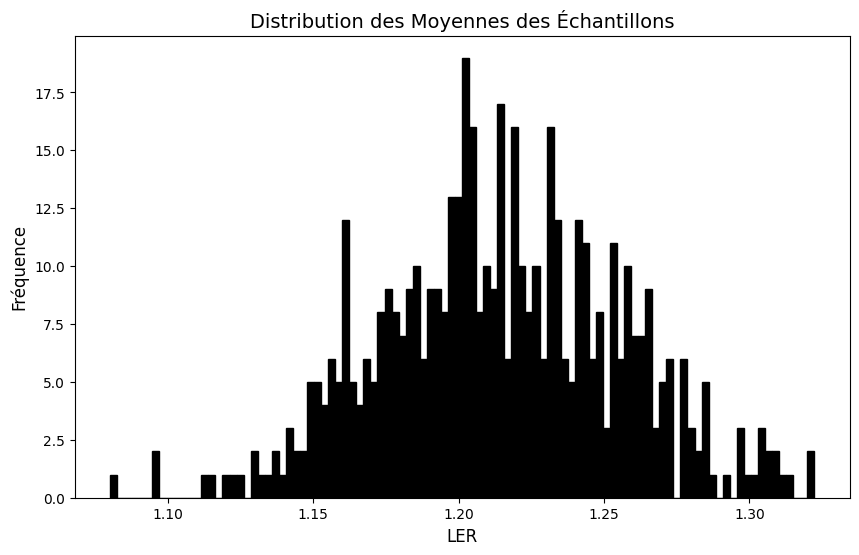

In [8]:
project.plot_dist_mean(d1['LER_tot'].to_numpy())

4. Classer les cultures suivant la probabilité qu'une expérience montre un rendement accru pour l'association de culture (on ne considérera que les cultures qui interviennent dans plus de 10 expérience).

In [9]:
project.get_sorted_crops(d2)

[('Fava bean', 0.6744186046511628),
 ('Pea', 0.5581395348837209),
 ('Strawberry', 0.4166666666666667),
 ('Millet', 0.38461538461538464),
 ('Bean', 0.3463687150837989),
 ('Maize', 0.31096196868008946),
 ('Beetroot', 0.3),
 ('Safed musli', 0.2916666666666667),
 ('Banana', 0.2857142857142857),
 ('Lablab bean', 0.23529411764705882),
 ('Pigeon pea', 0.22413793103448276),
 ('Potato', 0.14285714285714285),
 ('Radish', 0.125),
 ('Lettuce', 0.1076923076923077),
 ('Peanut', 0.10344827586206896),
 ('Carrot', 0.10344827586206896),
 ('Basil', 0.1),
 ('Tomato', 0.0975609756097561),
 ('Pearl millet', 0.06818181818181818),
 ('Cowpea', 0.05555555555555555),
 ('Pumpkin', 0.05555555555555555),
 ('Okra', 0.05),
 ('Pepper', 0.047619047619047616),
 ('Cabbage', 0.047619047619047616),
 ('Groundnut', 0.043478260869565216),
 ('Mung bean', 0.0),
 ('Fenugreek', 0.0),
 ('Onion', 0.0),
 ('Cauliflower', 0.0),
 ('Black gram', 0.0),
 ('Eggplant', 0.0),
 ('Cluster bean', 0.0),
 ('Rice', 0.0),
 ('Cucumber', 0.0),
 ('App

5. Déterminer les groupes de cultures qui s'associent bien (<span style="text-decoration:overline">LER</span>>1.8). On créera pour cela un graphe dont on isolera les composantes connexes en utilisant networkx.

In [10]:
project.list_clusters(d2, th=1.8)

Cluster 0
-----------
Apple
Bean
Cabbage
Ceylon spinach
Cowpea
Eggplant
Fava bean
Fenugreek
Jackfruit
Lablab bean
Lettuce
Maize
Marigold
Melon
Mustard
Onion
Pea
Peanut
Pigeon pea
Potato
Radish
Safed musli
Spinach
Strawberry
Sweet potato
Tomato
Watermelon
-----------
Cluster 1
-----------
Carrot
Kale
Parsley
Pepper
-----------
Cluster 2
-----------
Banana
Coffee arabica
Rubber
-----------
Cluster 3
-----------
Beetroot
Chicory
Collard
-----------
Cluster 4
-----------
Cassava
Sapota
Turmeric
Xanthosoma
-----------
Cluster 5
-----------
Durum wheat
Olive
-----------
Cluster 6
-----------
Indian jujube
Perennial ryegrass
Rattan grass
-----------
